In [ ]:
# CounterFactual Explanations using the "BirthsFinal Data for 2022”. Published by “Centres for disease control and prevention (CDC)" data.


In [8]:
import pandas as pd
# Makes sure we see all columns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
# %% Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score


In [175]:
path="/content/drive/MyDrive/Colab Notebooks/counter_factual/input_data_final.csv"
data1 = pd.read_csv(path)


Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.


In [176]:
data1.shape

(165521, 62)

In [182]:
data1

,Birth Place,Mother’s Single Years of Age,Mother’s Nativity,Residence Status,Mother’s Hispanic Origin,Mother’s Race/Hispanic Origin,Mother’s Education,Father’s Combined Age,Father’s Hispanic Origin,Father’s Race/Hispanic Origin,Father’s Education,Prior Other Terminations,Month Prenatal Care Began,Number of Prenatal Visits,Cigarettes Before Pregnancy,Cigarette Recode,Mother’s Height in Total Inches,Body Mass Index,Weight Gain,Pre-pregnancy Diabetes,Gestational Diabetes,Pre-pregnancy Hypertension,Gestational Hypertension,Hypertension Eclampsia,Infertility Treatment Used,Fertility Enhancing Drugs,Asst. Reproductive Technology,Induction of Labor,Augmentation of Labor,Steroids,Antibiotics,Chorioamnionitis,Fetal Presentation at Delivery,Final Route & Method of Delivery,Maternal Transfusion,Perineal Laceration,Ruptured Uterus,Unplanned Hysterectomy,Admit to Intensive Care,Assisted Ventilation (immediately),Assisted Ventilation > 6 hrs,Admission to NICU,Surfactant,Antibiotics for Newborn,Seizures,Limb Reduction Defect,Cleft Lip w/ or w/o Cleft Palate,Cleft Palate alone,Down Syndrome,Suspected Chromosomal Disorder,Hypospadias,Infant Transferred,Infant Living at Time of Report,Infant Breastfed at Discharge,Successful External Cephalic Version,Cigarettes Before Pregnancy.1,Delivery Weight Recode,Five Minute APGAR Score,Combined Gestation – Detail in Weeks,Obstetric Estimate Edited,Birth Weight – Detail in Grams (Edited),Conditions
0,1,42,1,1,0.0,1.0,1.0,90.0,0.0,6.0,1.0,1.0,21.0,50.0,0.0,1,81.0,7.430,73.0,N,N,N,N,N,N,Y,1,N,N,N,N,Y,1,X,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,71.0,94.0,38.0,38.0,2500.0,1
1,1,26,1,1,5.0,1.0,1.0,80.0,0.0,5.0,1.0,1.0,91.0,91.0,0.0,1,91.0,3.020,83.0,Y,N,N,N,N,X,X,1,Y,N,N,N,Y,1,X,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,421.0,94.0,39.0,39.0,3020.0,1
2,1,24,2,1,4.0,1.0,1.0,50.0,1.0,3.0,1.0,2.0,11.0,50.0,0.0,1,91.0,6.330,61.0,N,N,N,N,Y,X,X,1,N,N,Y,N,Y,1,X,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,361.0,94.0,34.0,32.0,1925.0,1
3,1,21,2,1,4.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,31.0,80.0,0.0,1,1.0,9.330,53.0,N,N,N,N,N,X,X,1,N,Y,Y,N,Y,1,X,N,N,N,N,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,751.0,94.0,34.0,34.0,1970.0,0
4,1,30,2,1,4.0,1.0,1.0,50.0,4.0,3.0,1.0,3.0,91.0,91.0,0.0,1,41.0,7.530,84.0,N,N,N,N,N,X,X,1,N,N,N,N,N,4,N,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,981.0,94.0,39.0,39.0,3850.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165516,1,27,1,2,5.0,1.0,1.0,60.0,5.0,3.0,1.0,4.0,31.0,60.0,0.0,1,91.0,7.250,2.0,N,N,N,N,N,X,X,1,N,N,N,N,N,4,N,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,721.0,94.0,34.0,33.0,2470.0,1
165517,1,34,2,1,4.0,1.0,1.0,30.0,4.0,8.0,1.0,2.0,21.0,30.0,0.0,1,21.0,1.340,31.0,Y,N,N,N,N,X,X,1,N,N,N,N,N,4,N,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,741.0,94.0,41.0,39.0,3020.0,1
165518,1,20,1,1,9.0,1.0,1.0,90.0,9.0,9.0,1.0,1.0,91.0,91.0,0.0,1,71.0,9.990,99.0,N,N,N,N,N,X,X,1,N,N,N,N,Y,1,X,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,591.0,94.0,40.0,40.0,3665.0,1
165519,1,19,2,1,4.0,1.0,1.0,0.0,4.0,3.0,1.0,1.0,31.0,40.0,0.0,1,61.0,3.420,45.0,N,N,N,N,N,X,X,1,N,N,N,N,Y,3,X,N,N,N,N,1,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,U,N,0.0,91.0,83.0,38.0,39.0,4026.0,1


In [19]:

class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path="/content/drive/MyDrive/Colab Notebooks/counter_factual/input_data_final.csv"):
        self.data = pd.read_csv(path)

    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols=['Birth Place',
        'Mother’s Nativity',
        'Residence Status',
        'Mother’s Hispanic Origin',
        'Mother’s Race/Hispanic Origin',
        'Mother’s Education',
        'Father’s Hispanic Origin',
        'Father’s Race/Hispanic Origin',
        'Father’s Education',
        'Pre-pregnancy Diabetes',
        'Gestational Diabetes',
        'Pre-pregnancy Hypertension',
        'Gestational Hypertension',
        'Hypertension Eclampsia',
        'Infertility Treatment Used',
        'Fertility Enhancing Drugs',
        'Asst. Reproductive Technology',
        'Induction of Labor',
        'Augmentation of Labor',
        'Steroids',
        'Antibiotics',
        'Chorioamnionitis',
        'Maternal Transfusion',
        'Perineal Laceration',
        'Ruptured Uterus',
        'Unplanned Hysterectomy',
        'Admit to Intensive Care',
        'Assisted Ventilation (immediately)',
        'Assisted Ventilation > 6 hrs',
        'Admission to NICU',
        'Surfactant',
        'Antibiotics for Newborn',
        'Seizures',
        'Limb Reduction Defect',
        'Cleft Lip w/ or w/o Cleft Palate',
        'Cleft Palate alone',
        'Down Syndrome',
        'Suspected Chromosomal Disorder',
        'Hypospadias',
        'Infant Transferred',
        'Infant Living at Time of Report',
        'Infant Breastfed at Discharge',
        'Successful External Cephalic Version']

        encoded = pd.get_dummies(self.data[categorical_cols])

        # Update data with new columns
        self.data = pd.concat([encoded, self.data], axis=1)

        self.data.drop(categorical_cols, axis=1, inplace=True)

        # Impute missing values of BMI
        self.data = self.data.fillna(0)
        # print(self.data.columns)
        # print(self.data(10))

        # Drop id as it is not relevant
        # self.data.drop(["id","",""], axis=1, inplace=True)
        self.data.drop(["Fetal Presentation at Delivery","Cigarette Recode","Final Route & Method of Delivery"],axis=1,inplace=True)

        # Standardization
        # Usually we would standardize here and convert it back later
        # But for simplification we will not standardize / normalize the features

    def get_data_split(self):
        X = self.data.iloc[:,:-1]
        y = self.data.iloc[:,-1]
        return train_test_split(X, y, test_size=0.20, random_state=2024)



In [20]:
#  Counterfactuals.py
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score


In [21]:

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()


<ipython-input-19-d36901f433de>:6: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(path)


In [33]:
# Split the data for evaluation
X_train, X_test, y_train, y_test=data_loader.get_data_split()

In [34]:
print(X_train.shape)
print(X_test.shape)

(132416, 131)
(33105, 131)


In [35]:
len(X_test)

33105

In [36]:
y_test

82812     1
108715    1
61002     1
17725     1
79573     1
         ..
108705    1
133605    1
44357     1
75218     1
128352    0
Name: Conditions, Length: 33105, dtype: int64

In [37]:
!pip install interpret

In [38]:
# Working with Lime

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

In [30]:
# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()


<ipython-input-19-d36901f433de>:6: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(path)


In [31]:
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()

In [39]:
X_train.shape

(132416, 131)

In [40]:
X_test.shape

(33105, 131)

In [41]:
y_train.shape

(132416,)

In [42]:
y_test.shape

(33105,)

In [117]:
!pip install lime


In [118]:
# Import the necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

In [119]:
# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

<ipython-input-19-d36901f433de>:6: DtypeWarning:

Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.



In [120]:
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()

In [121]:
print(X_train.shape)
print(X_test.shape)

(132416, 131)
(33105, 131)


In [122]:
# %% Fit blackbox model
rf = RandomForestClassifier()

In [123]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [177]:
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


F1 Score 0.9999311036143139
Accuracy 0.9999697930826159


In [133]:
from interpret.blackbox import LimeTabular

In [134]:
# # Initilize Lime for Tabular data
# lime = LimeTabular(predict_fn=rf.predict_proba,
#                    data=X_train,
#                    random_state=1)


In [180]:
import lime

In [181]:
# Get local explanations
lime_local =lime.explain_local(X_test[-20:],
                                y_test[-20:],
                                name='LIME')

AttributeError: module 'lime' has no attribute 'explain_local'

In [140]:
#

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap


In [141]:

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()


Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.


In [142]:
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()

In [143]:
# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
y_pred = rf.predict(X_test)

In [145]:


print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.9999311036143139
Accuracy 0.9999697930826159


In [146]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(rf)

In [147]:

# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])


In [148]:
X_test[start_index:end_index]

,Pre-pregnancy Diabetes_N,Pre-pregnancy Diabetes_U,Pre-pregnancy Diabetes_Y,Gestational Diabetes_N,Gestational Diabetes_U,Gestational Diabetes_Y,Pre-pregnancy Hypertension_N,Pre-pregnancy Hypertension_U,Pre-pregnancy Hypertension_Y,Gestational Hypertension_N,Gestational Hypertension_U,Gestational Hypertension_Y,Hypertension Eclampsia_1,Hypertension Eclampsia_N,Hypertension Eclampsia_U,Hypertension Eclampsia_Y,Infertility Treatment Used_N,Infertility Treatment Used_U,Infertility Treatment Used_X,Infertility Treatment Used_Y,Fertility Enhancing Drugs_1,Fertility Enhancing Drugs_N,Fertility Enhancing Drugs_U,Fertility Enhancing Drugs_X,Fertility Enhancing Drugs_Y,Asst. Reproductive Technology_0,Asst. Reproductive Technology_1,Asst. Reproductive Technology_N,Asst. Reproductive Technology_U,Asst. Reproductive Technology_X,Asst. Reproductive Technology_Y,Induction of Labor_N,Induction of Labor_U,Induction of Labor_Y,Augmentation of Labor_N,Augmentation of Labor_U,Augmentation of Labor_Y,Steroids_N,Steroids_U,Steroids_Y,Antibiotics_N,Antibiotics_U,Antibiotics_Y,Chorioamnionitis_1,Chorioamnionitis_N,Chorioamnionitis_U,Chorioamnionitis_Y,Maternal Transfusion_N,Maternal Transfusion_U,Maternal Transfusion_Y,Perineal Laceration_N,Perineal Laceration_U,Perineal Laceration_Y,Ruptured Uterus_N,Ruptured Uterus_U,Ruptured Uterus_Y,Unplanned Hysterectomy_1,Unplanned Hysterectomy_N,Unplanned Hysterectomy_U,Unplanned Hysterectomy_Y,Admit to Intensive Care_0,Admit to Intensive Care_1,Admit to Intensive Care_N,Admit to Intensive Care_U,Admit to Intensive Care_Y,Assisted Ventilation (immediately)_N,Assisted Ventilation (immediately)_U,Assisted Ventilation (immediately)_Y,Assisted Ventilation > 6 hrs_N,Assisted Ventilation > 6 hrs_U,Assisted Ventilation > 6 hrs_Y,Admission to NICU_N,Admission to NICU_U,Admission to NICU_Y,Surfactant_N,Surfactant_U,Surfactant_Y,Antibiotics for Newborn_N,Antibiotics for Newborn_U,Antibiotics for Newborn_Y,Seizures_N,Seizures_U,Seizures_Y,Limb Reduction Defect_N,Limb Reduction Defect_U,Limb Reduction Defect_Y,Cleft Lip w/ or w/o Cleft Palate_N,Cleft Lip w/ or w/o Cleft Palate_U,Cleft Lip w/ or w/o Cleft Palate_Y,Cleft Palate alone_N,Cleft Palate alone_U,Cleft Palate alone_Y,Down Syndrome_C,Down Syndrome_N,Down Syndrome_P,Down Syndrome_U,Suspected Chromosomal Disorder_C,Suspected Chromosomal Disorder_N,Suspected Chromosomal Disorder_P,Suspected Chromosomal Disorder_U,Hypospadias_N,Hypospadias_U,Hypospadias_Y,Infant Transferred_N,Infant Transferred_U,Infant Transferred_Y,Infant Living at Time of Report_N,Infant Living at Time of Report_U,Infant Living at Time of Report_Y,Infant Breastfed at Discharge_N,Infant Breastfed at Discharge_U,Infant Breastfed at Discharge_Y,Successful External Cephalic Version_1,Successful External Cephalic Version_N,Successful External Cephalic Version_U,Successful External Cephalic Version_Y,Mother’s Single Years of Age,Father’s Combined Age,Prior Other Terminations,Month Prenatal Care Began,Number of Prenatal Visits,Cigarettes Before Pregnancy,Mother’s Height in Total Inches,Body Mass Index,Weight Gain,Cigarettes Before Pregnancy.1,Delivery Weight Recode,Five Minute APGAR Score,Combined Gestation – Detail in Weeks,Obstetric Estimate Edited,Birth Weight – Detail in Grams (Edited)
108715,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,34,27.0,0.0,1.0,15.0,0.0,66.0,24.0,31.0,0.0,180.0,9.0,39.0,39.0,3459.0


In [150]:
print(shap_values[0].shape)

# shap_values

(1, 131)


In [169]:
# shap_values

In [158]:
# %% >> Visualize local predictions
shap.initjs()


In [164]:

# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")


The RF predicted: 1


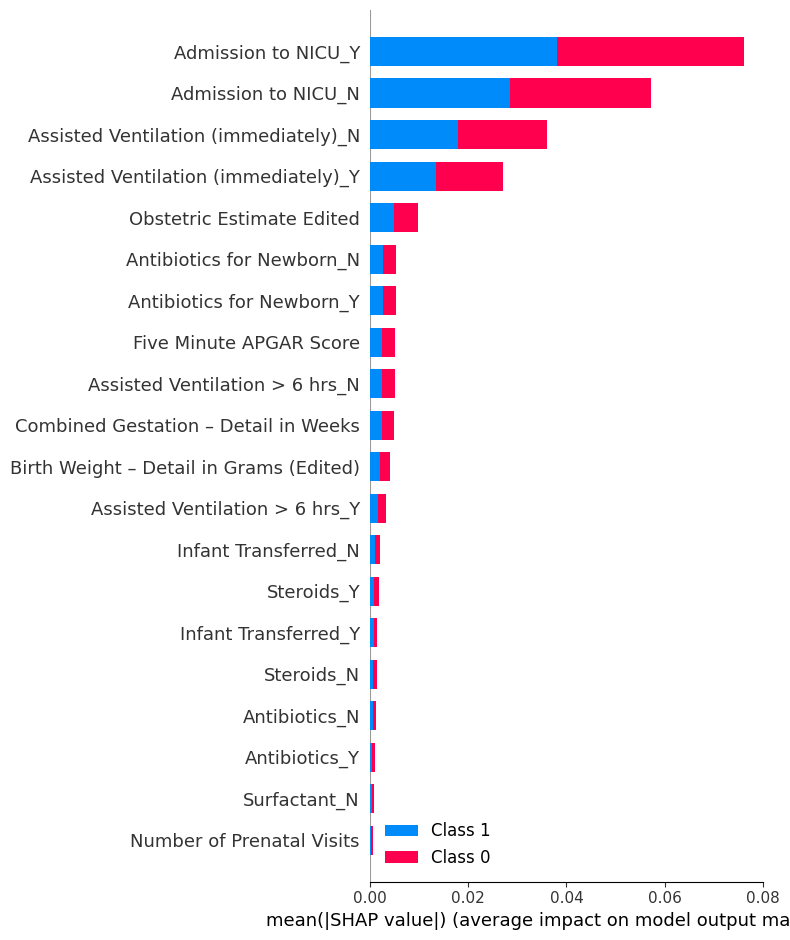

In [168]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)

In [ ]:
# Step_1 : Utils_file

In [ ]:
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,70.0,0,0,72.559998,30.4,0



Diverse Counterfactual set (new outcome: 1)


,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,154.24,-,1.0
1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,214.03,33.9,1.0
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,149.98,-,1.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('avg_glucose_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('bmi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bmi'].value_counts()
    for x_label, grp in _df_9.groupby('avg_glucose_level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('avg_glucose_level')
_ = plt.ylabel('bmi')